In [41]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
weather_data = pd.read_csv('weatherAUS.csv')
unique_locations = weather_data['Location'].unique()
unique_locations = list(map(lambda x: x.replace('PearceRAAF', 'Pearce RAAF'), unique_locations))

In [3]:
# call google map API to get the coordinates of each location
import requests
api_key = ''
import requests

def get_lat_lng(city, country, api_key):
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"
    params = {
        "address": f"{city},{country}",
        "key": api_key
    }
    response = requests.get(base_url, params=params)
    data = response.json()

    lat = data["results"][0]["geometry"]["location"]["lat"]
    lng = data["results"][0]["geometry"]["location"]["lng"]

    return lat, lng

city_map = {}
for city in unique_locations:
    latitude, longitude = get_lat_lng(city, "AU", api_key)
    city_map[city] = (latitude, longitude)

In [4]:
city_map["Katherine"] = (-14.46517, 132.26347)
city_map['PearceRAAF'] = city_map['Pearce RAAF']
del city_map['Pearce RAAF']

In [5]:
# add location coordinates to the dataset
weather_data['Latitude'] = weather_data['Location'].map(lambda x: city_map[x][0])
weather_data['Longitude'] = weather_data['Location'].map(lambda x: city_map[x][1])

In [40]:
# get all variables that are not categorical
non_categorical_variables = weather_data.select_dtypes(exclude=['object']).columns
non_categorical_variables = list(non_categorical_variables)

# get all categorical variables
categorical_variables = weather_data.select_dtypes(include=['object']).columns

# get all numerical variables name that have missing values
numerical_variables_with_missing_values = weather_data[non_categorical_variables].columns[weather_data[non_categorical_variables].isna().any()].tolist()
numerical_variables_with_missing_values

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

/var/folders/jj/4r8dblf53l9_ssdctfrstl480000gn/T/ipykernel_19428/191067783.py:21: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


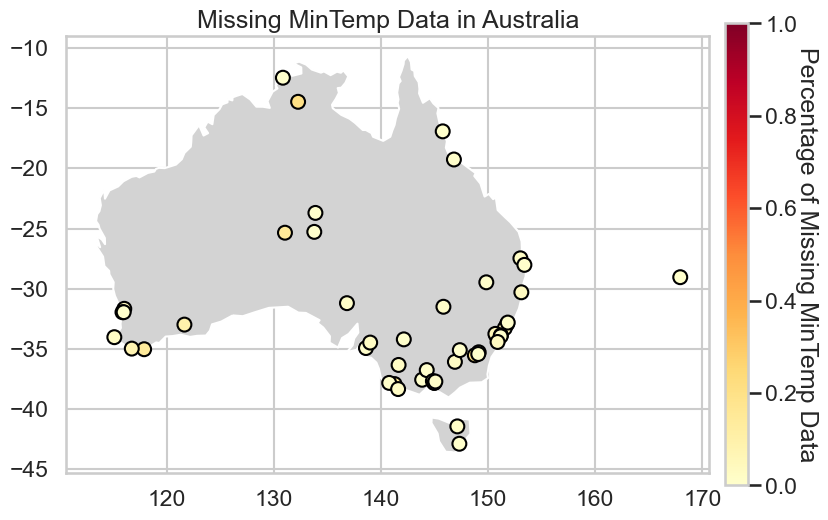

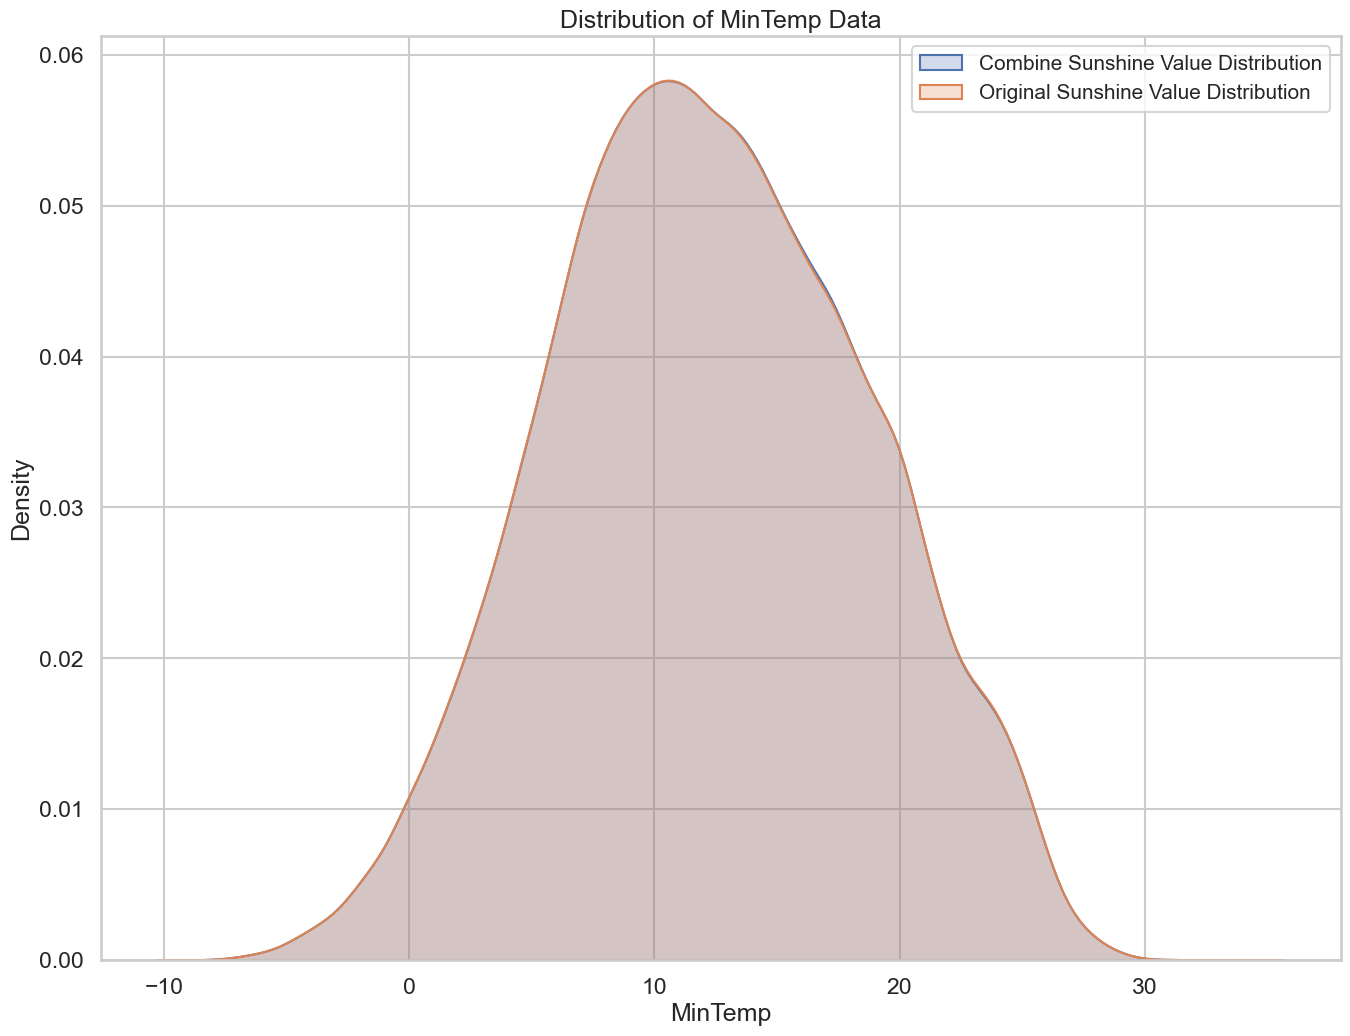

/var/folders/jj/4r8dblf53l9_ssdctfrstl480000gn/T/ipykernel_19428/191067783.py:21: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


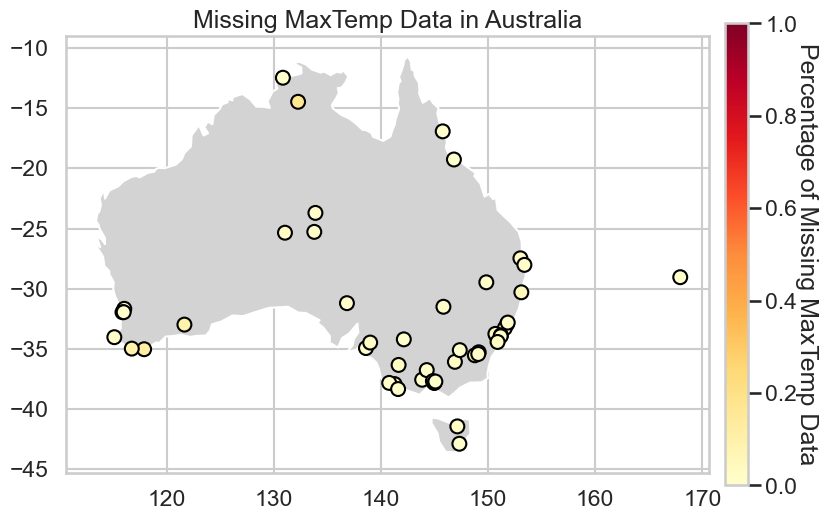

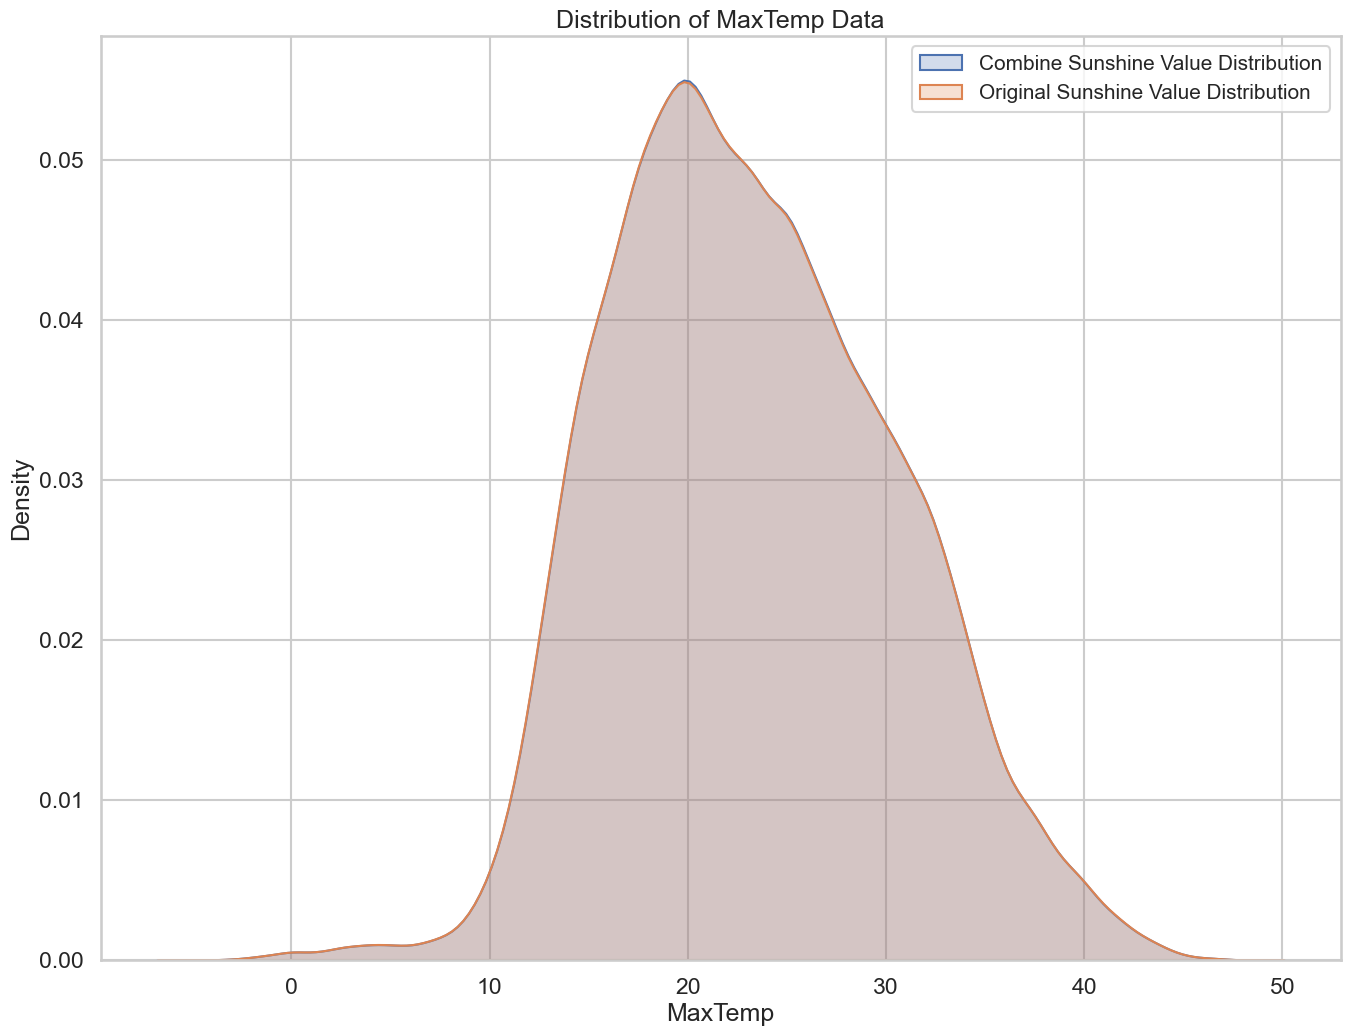

/var/folders/jj/4r8dblf53l9_ssdctfrstl480000gn/T/ipykernel_19428/191067783.py:21: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


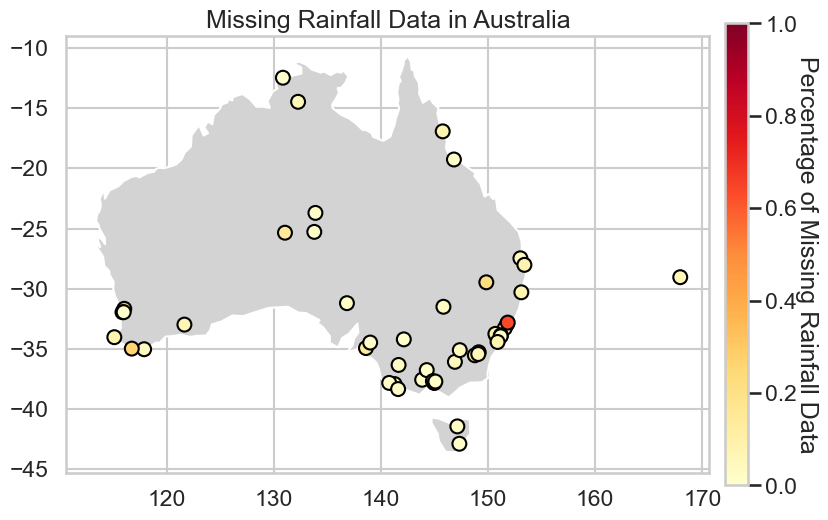

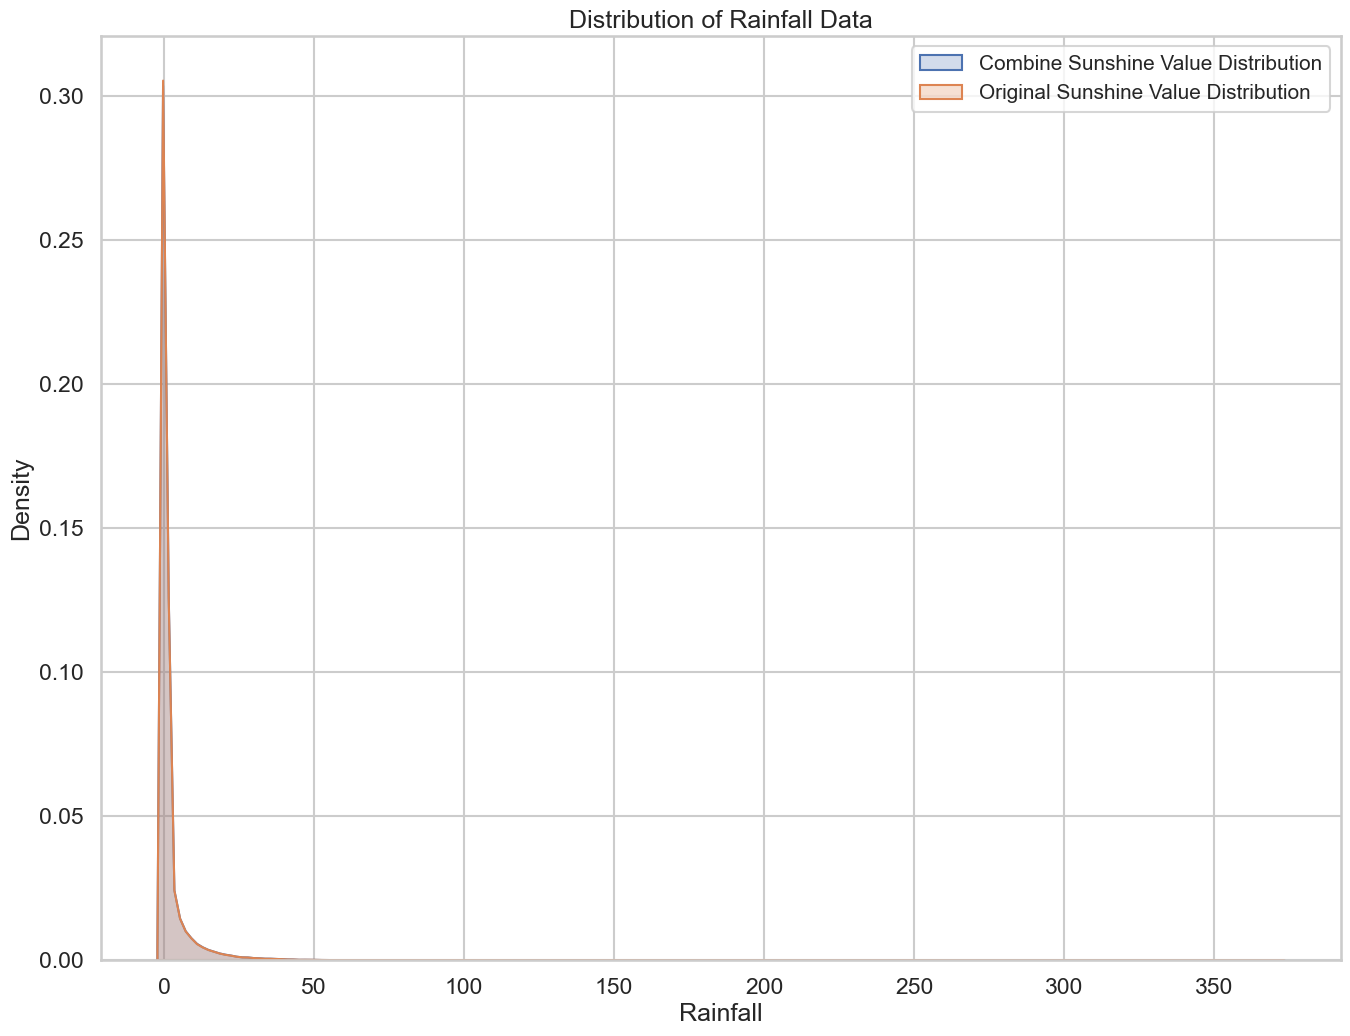

/var/folders/jj/4r8dblf53l9_ssdctfrstl480000gn/T/ipykernel_19428/191067783.py:21: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


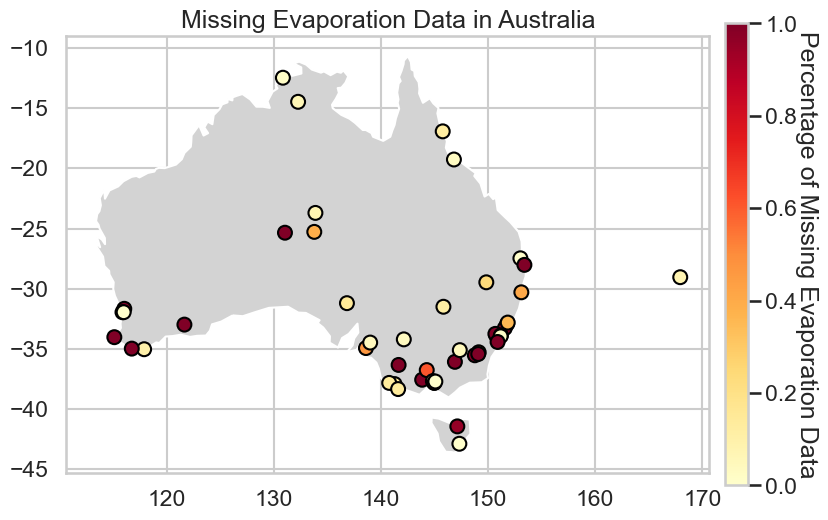

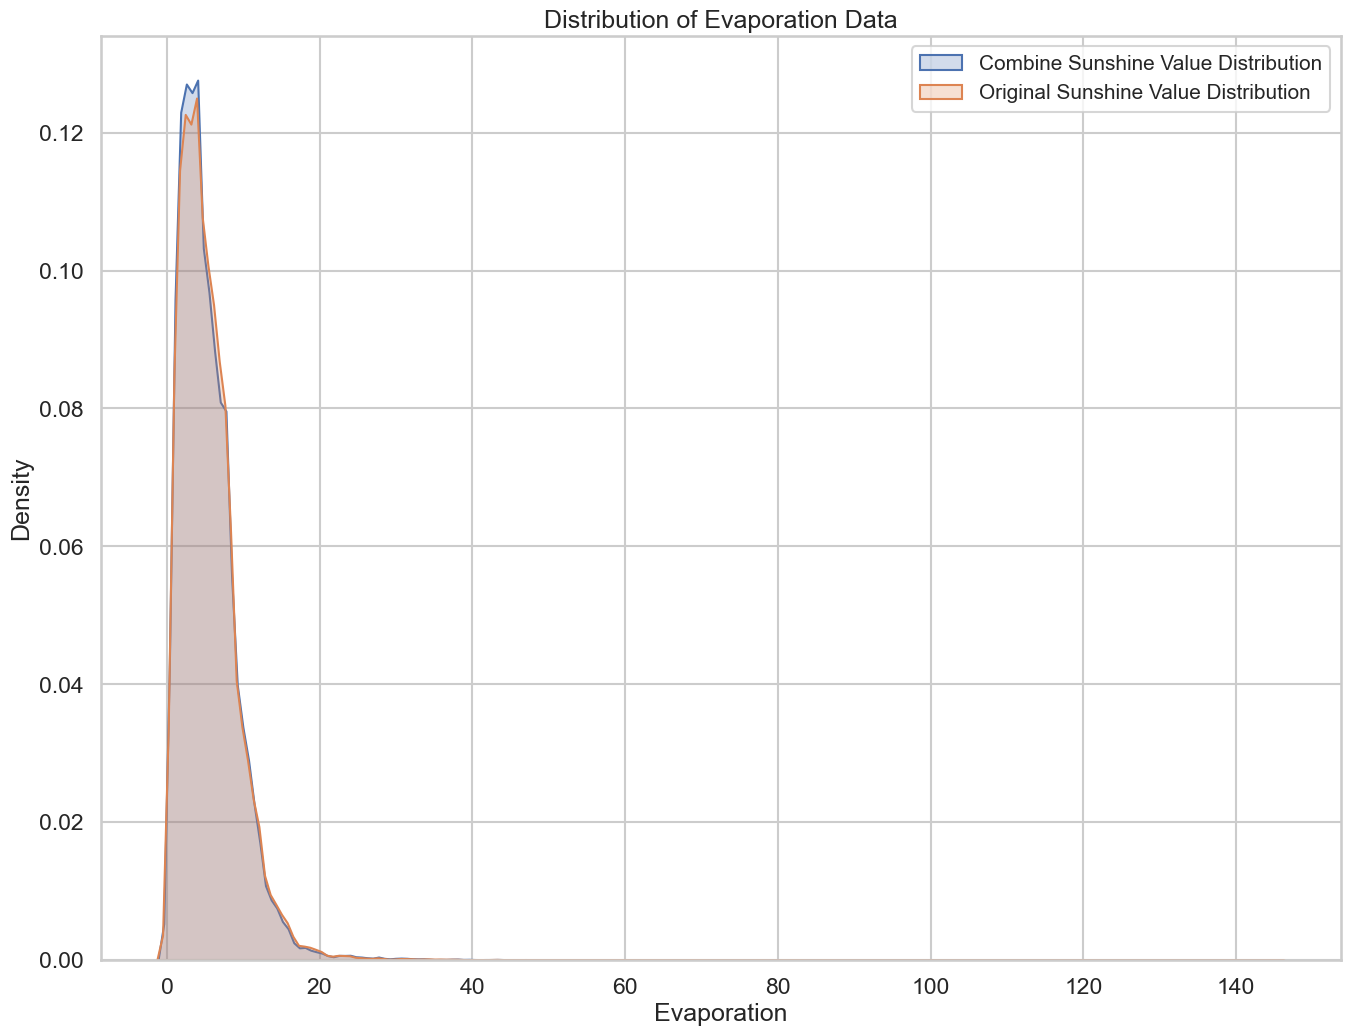

/var/folders/jj/4r8dblf53l9_ssdctfrstl480000gn/T/ipykernel_19428/191067783.py:21: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


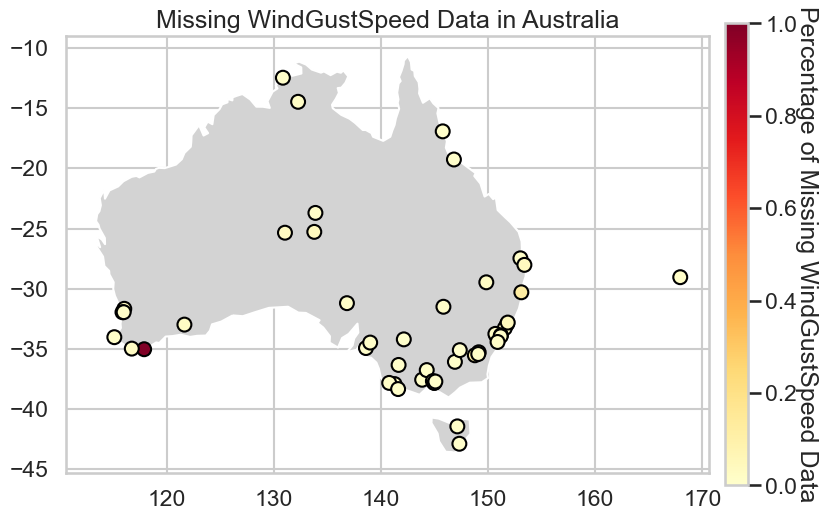

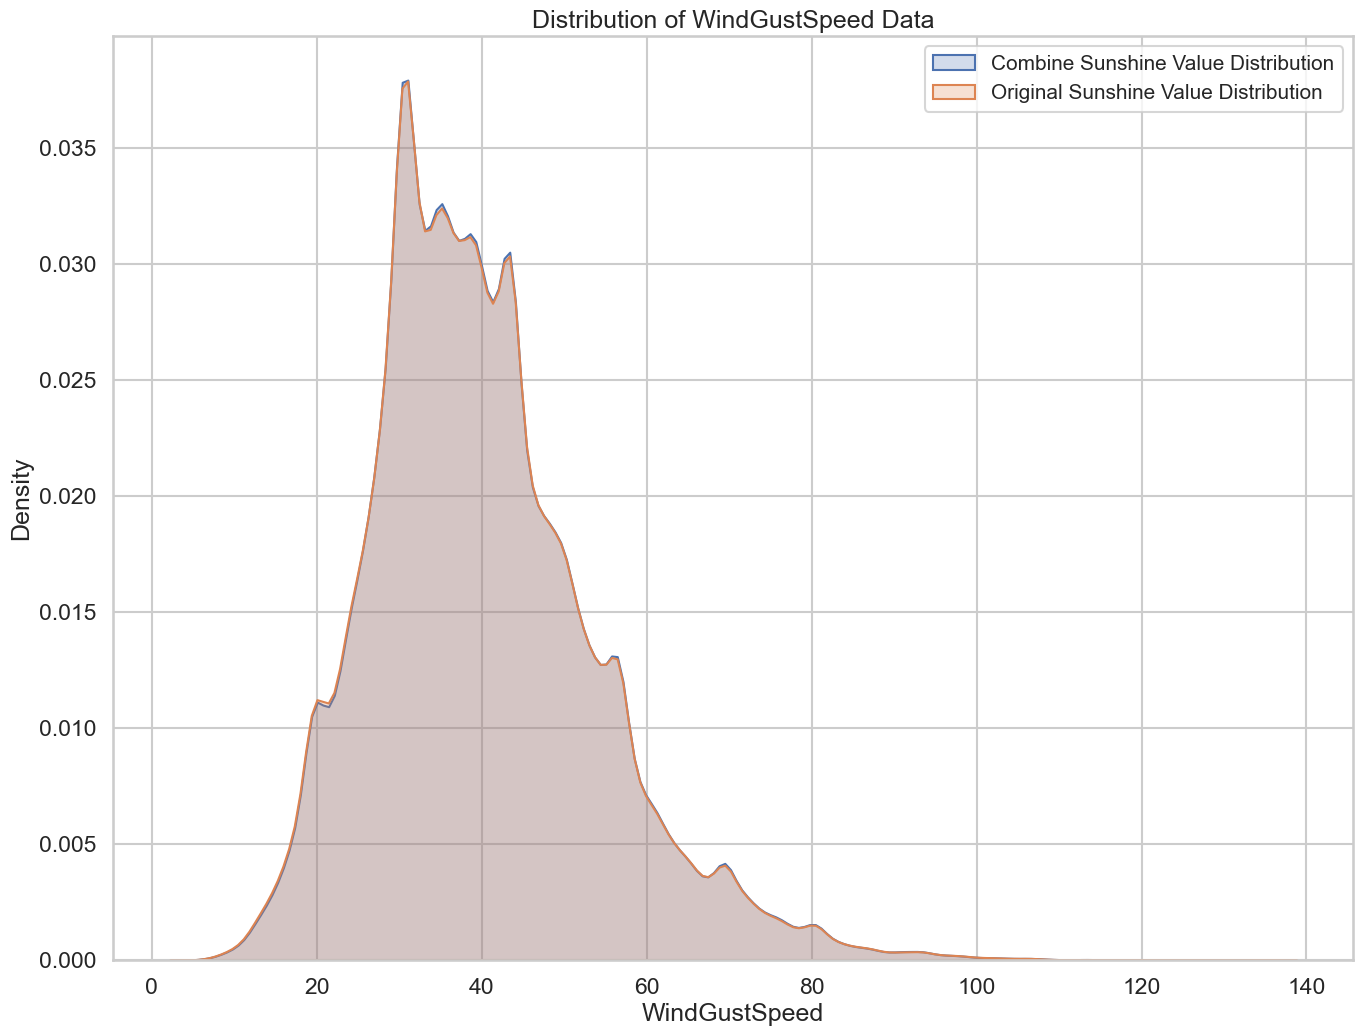

/var/folders/jj/4r8dblf53l9_ssdctfrstl480000gn/T/ipykernel_19428/191067783.py:21: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


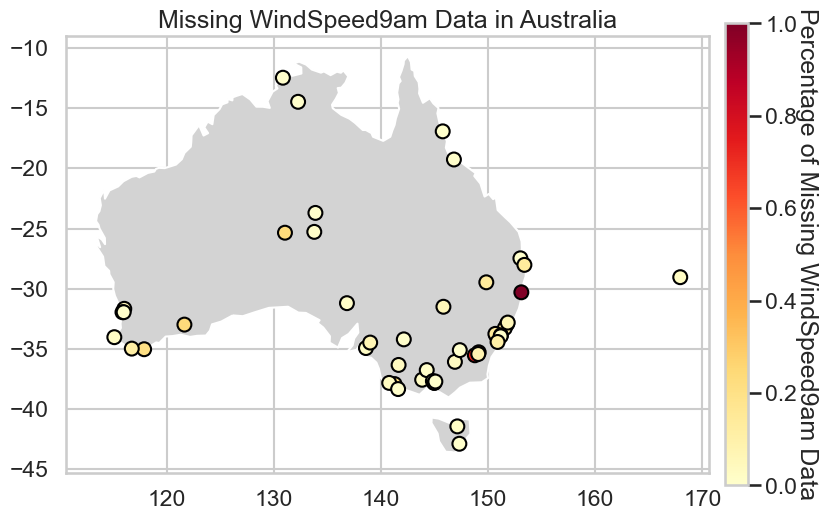

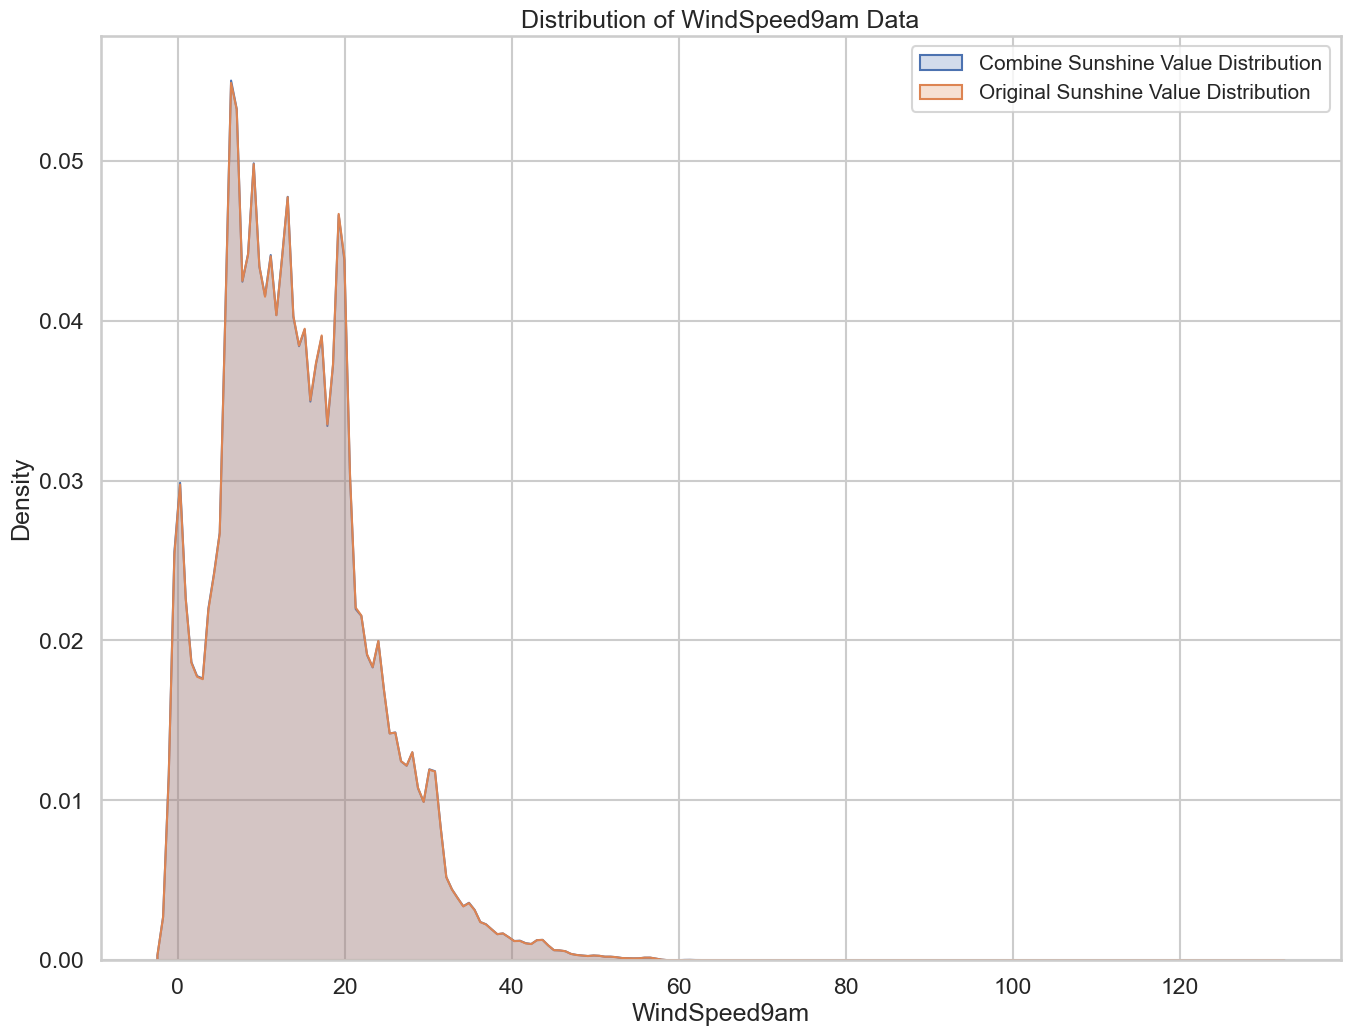

/var/folders/jj/4r8dblf53l9_ssdctfrstl480000gn/T/ipykernel_19428/191067783.py:21: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


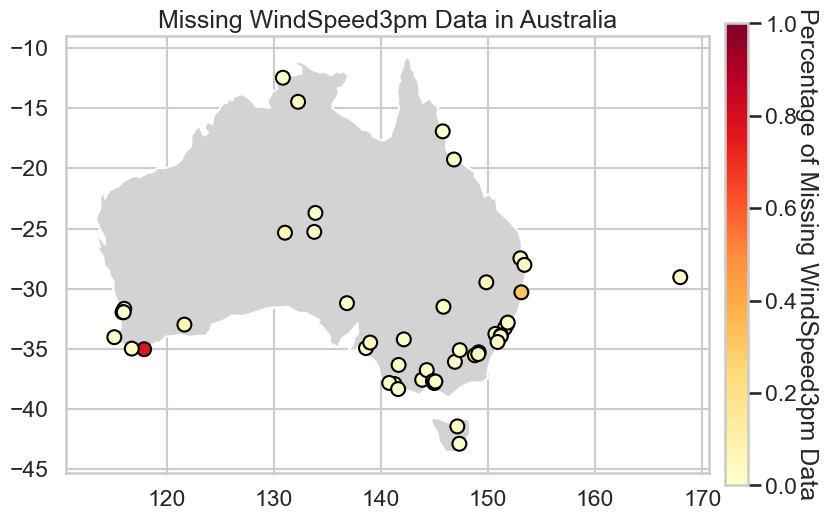

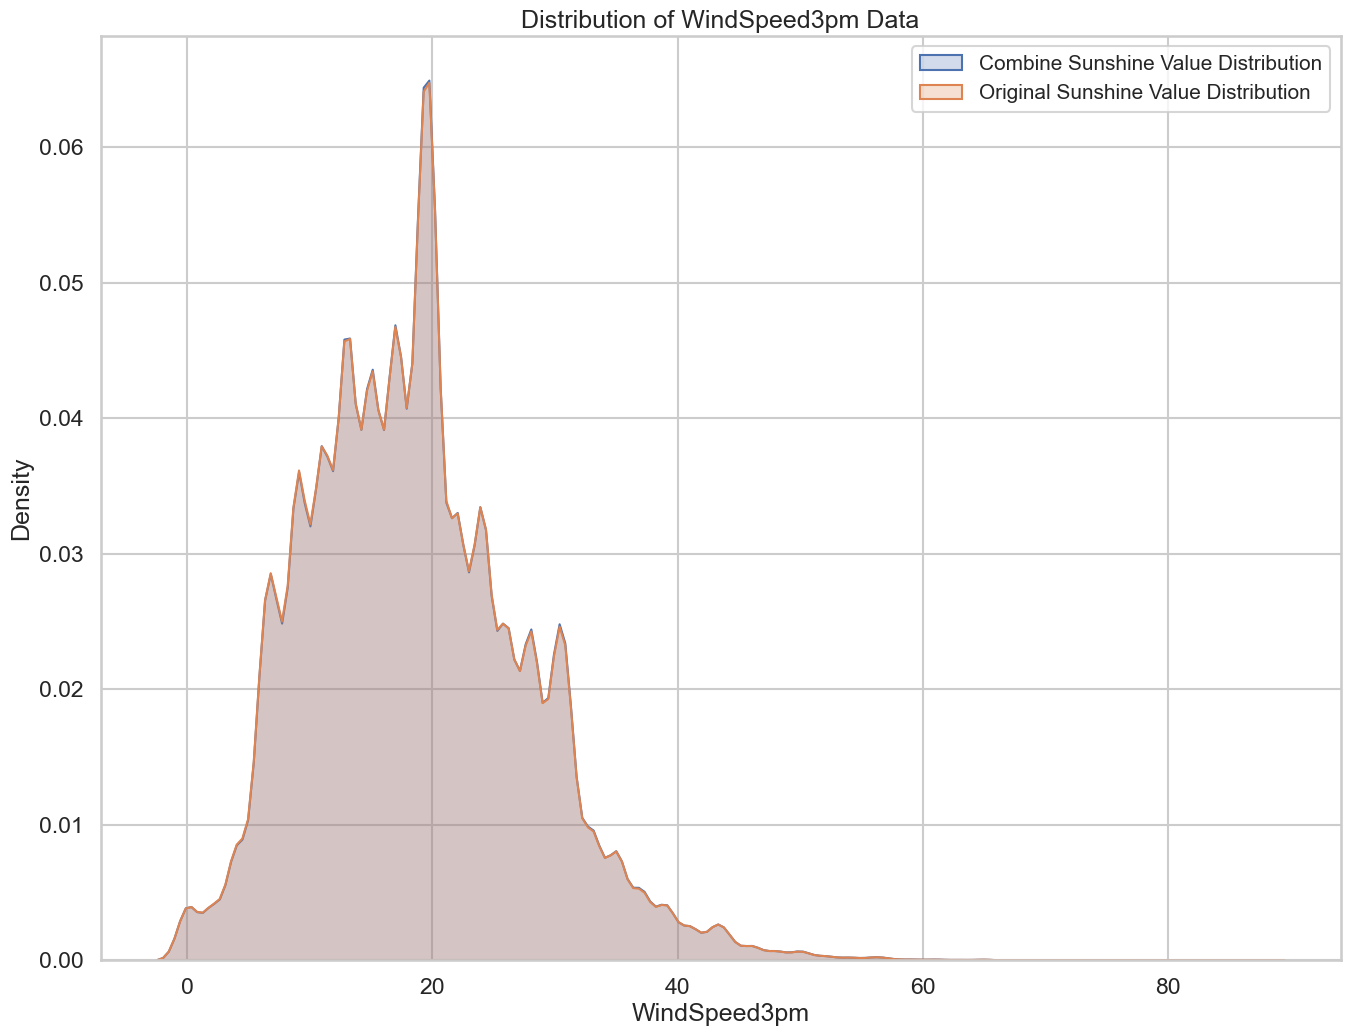

/var/folders/jj/4r8dblf53l9_ssdctfrstl480000gn/T/ipykernel_19428/191067783.py:21: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


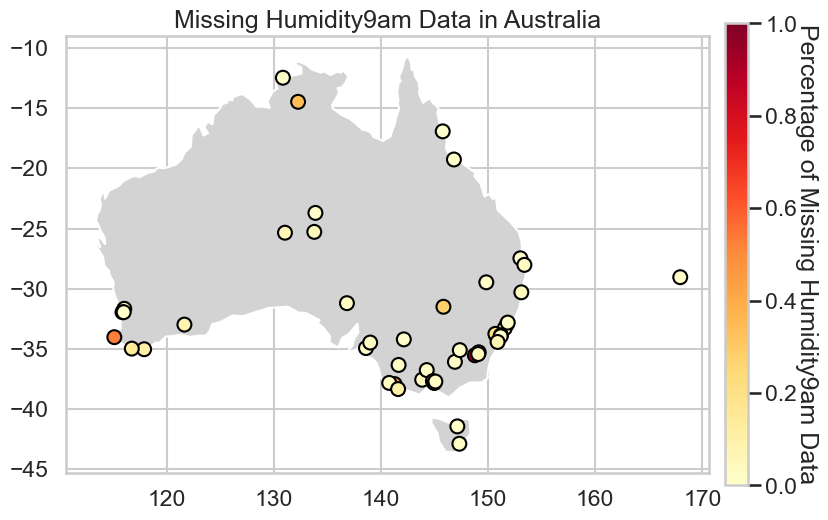

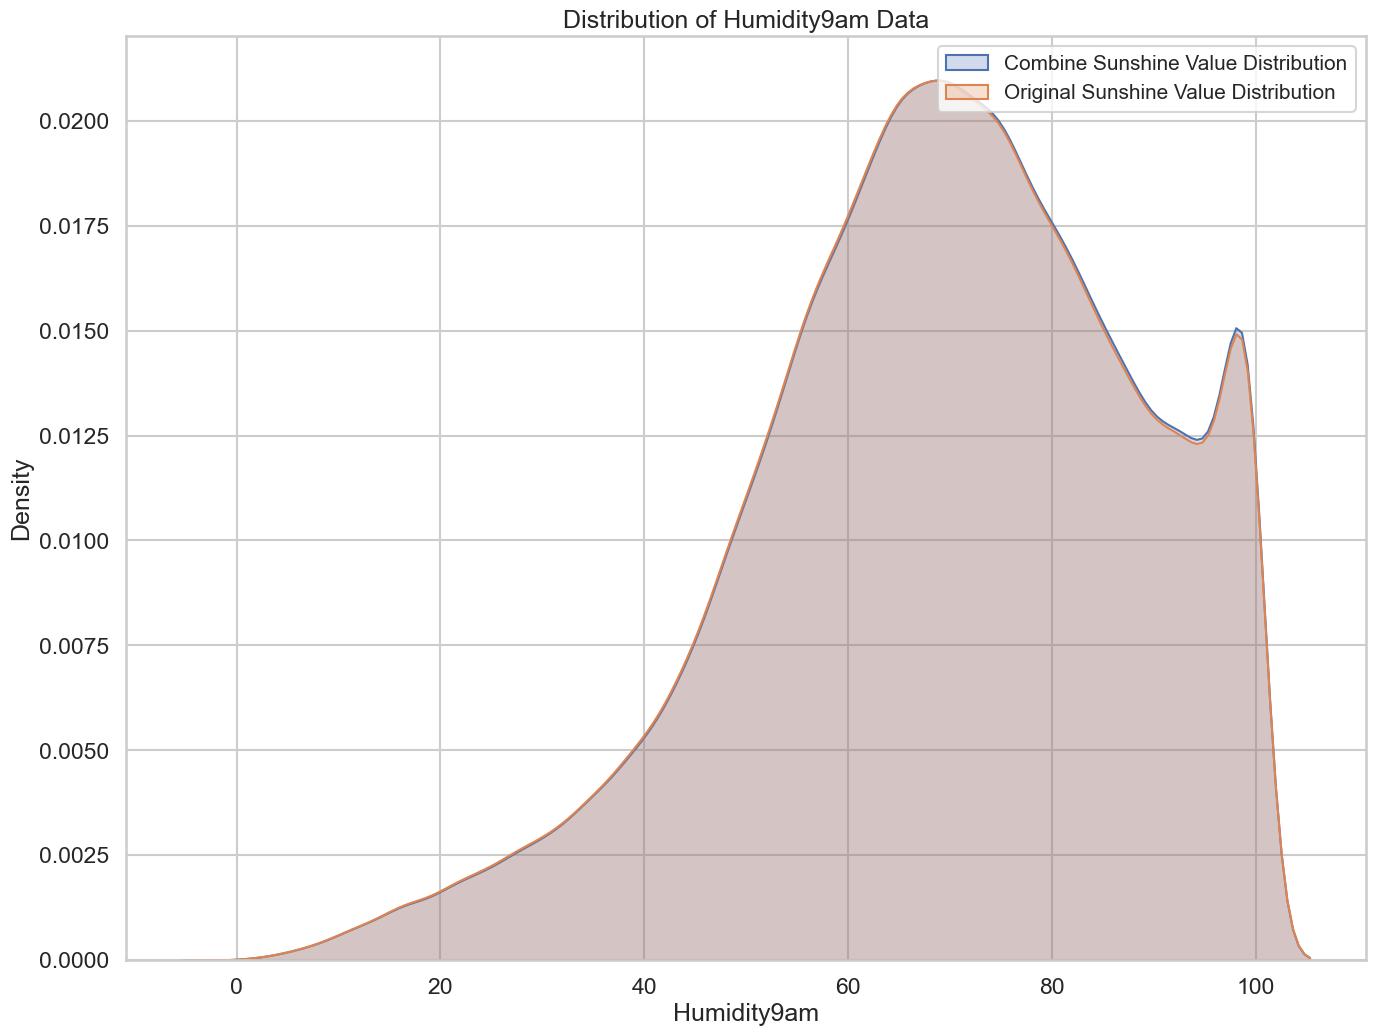

/var/folders/jj/4r8dblf53l9_ssdctfrstl480000gn/T/ipykernel_19428/191067783.py:21: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


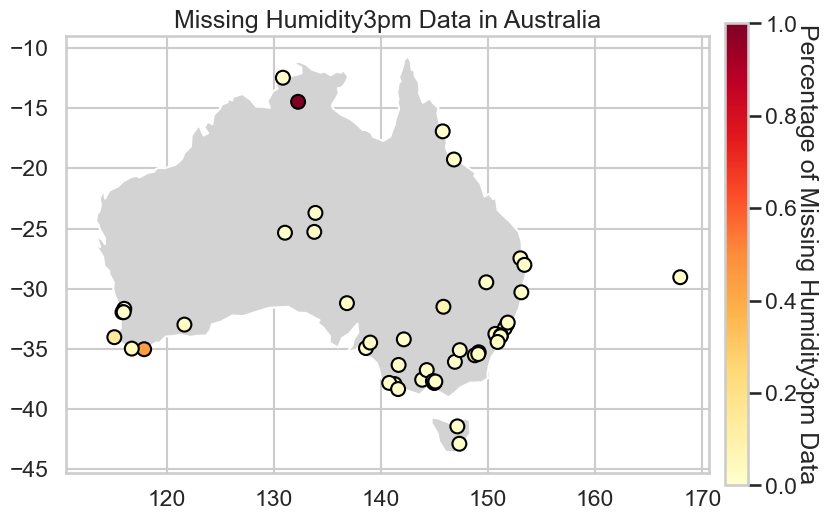

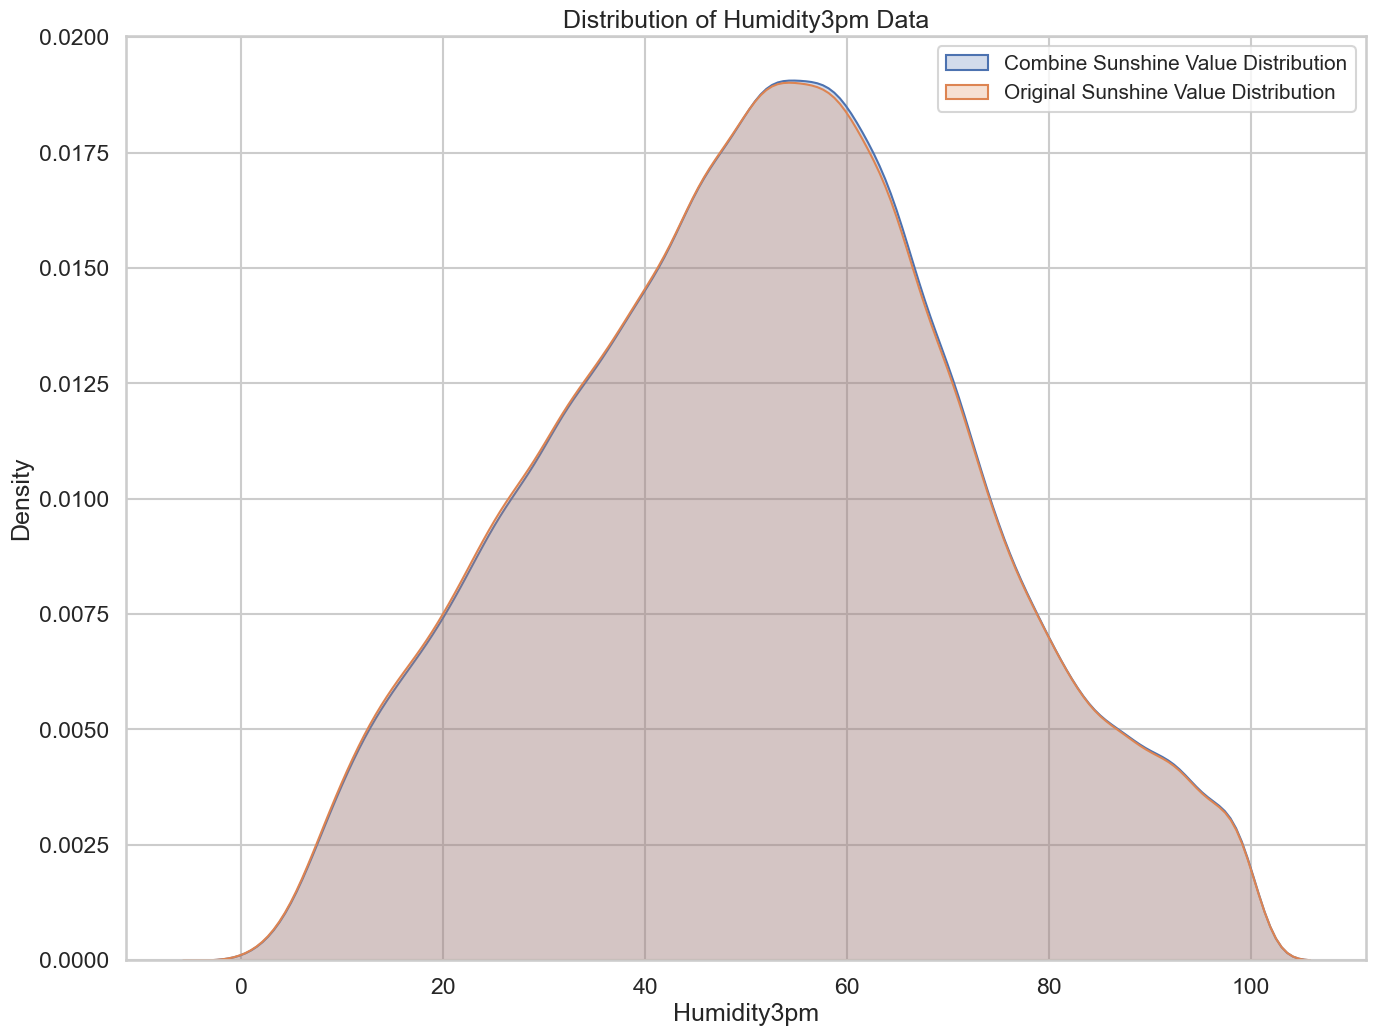

/var/folders/jj/4r8dblf53l9_ssdctfrstl480000gn/T/ipykernel_19428/191067783.py:21: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


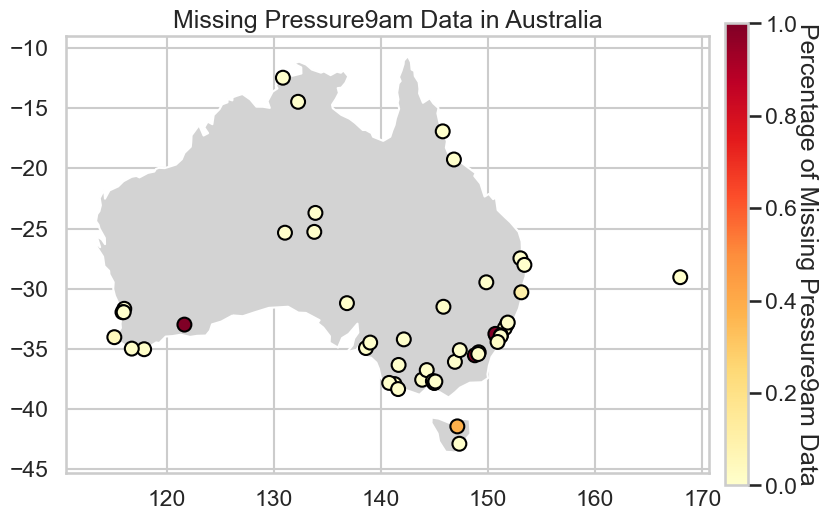

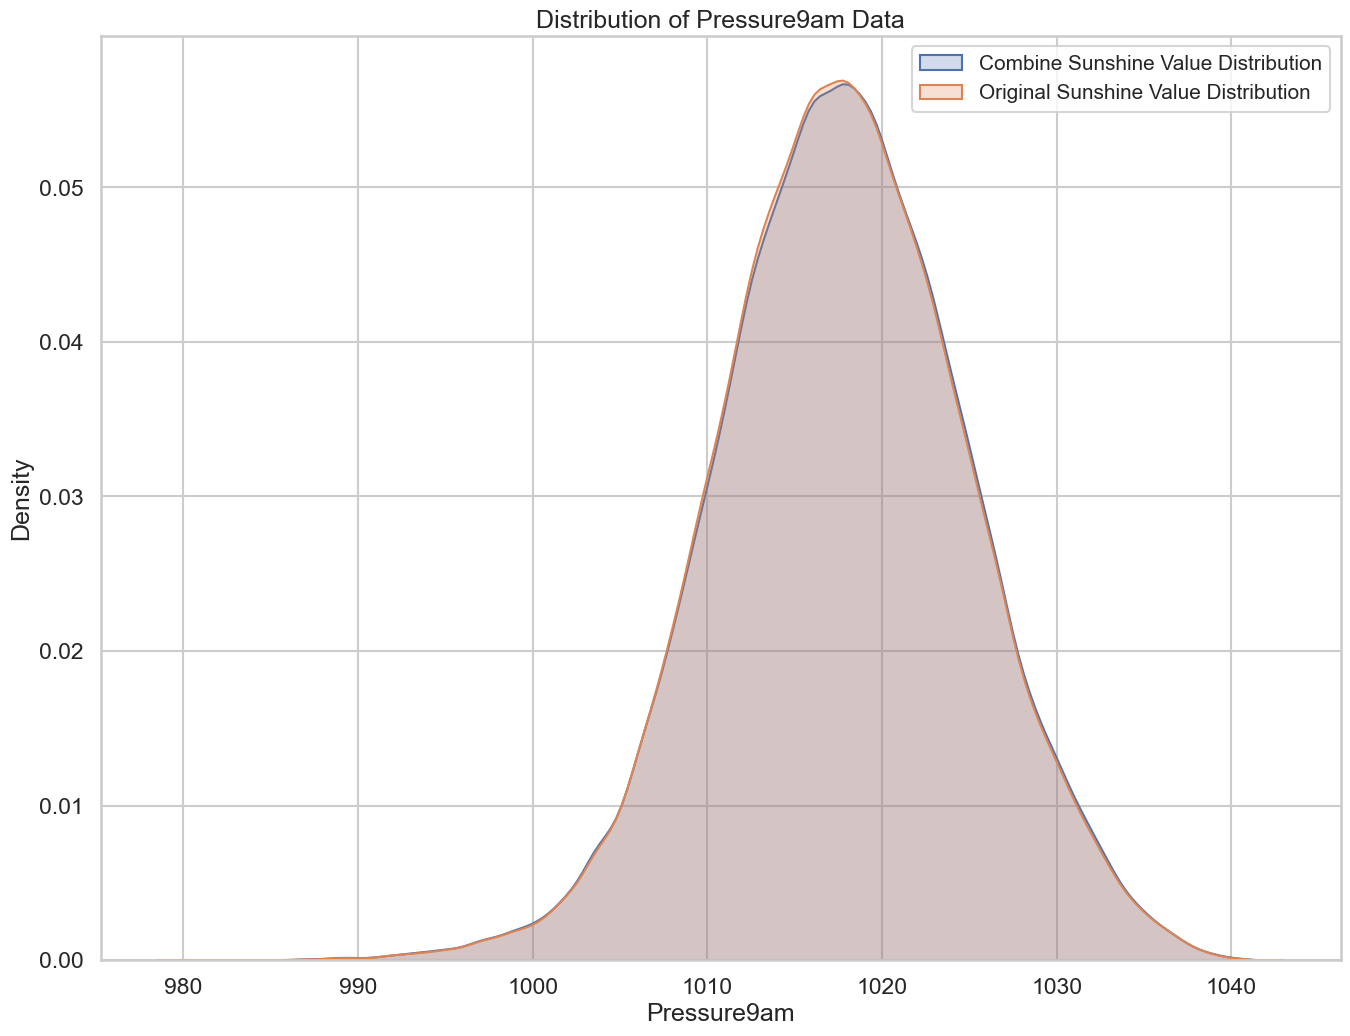

/var/folders/jj/4r8dblf53l9_ssdctfrstl480000gn/T/ipykernel_19428/191067783.py:21: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


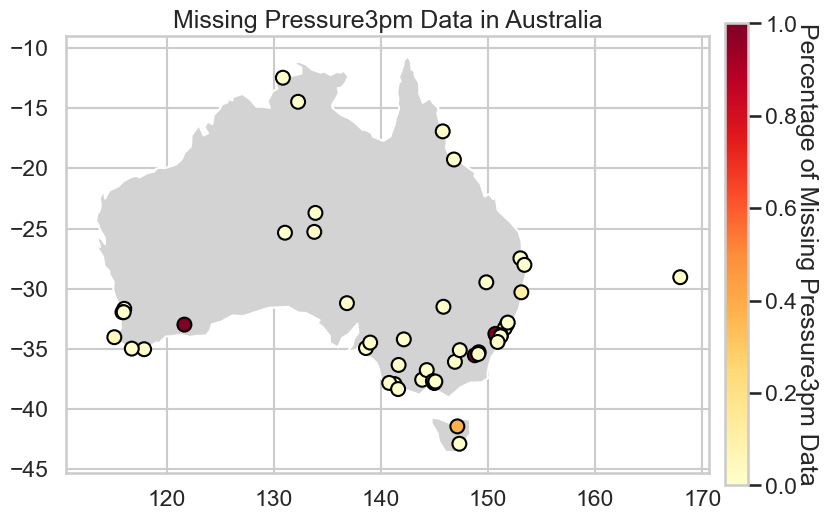

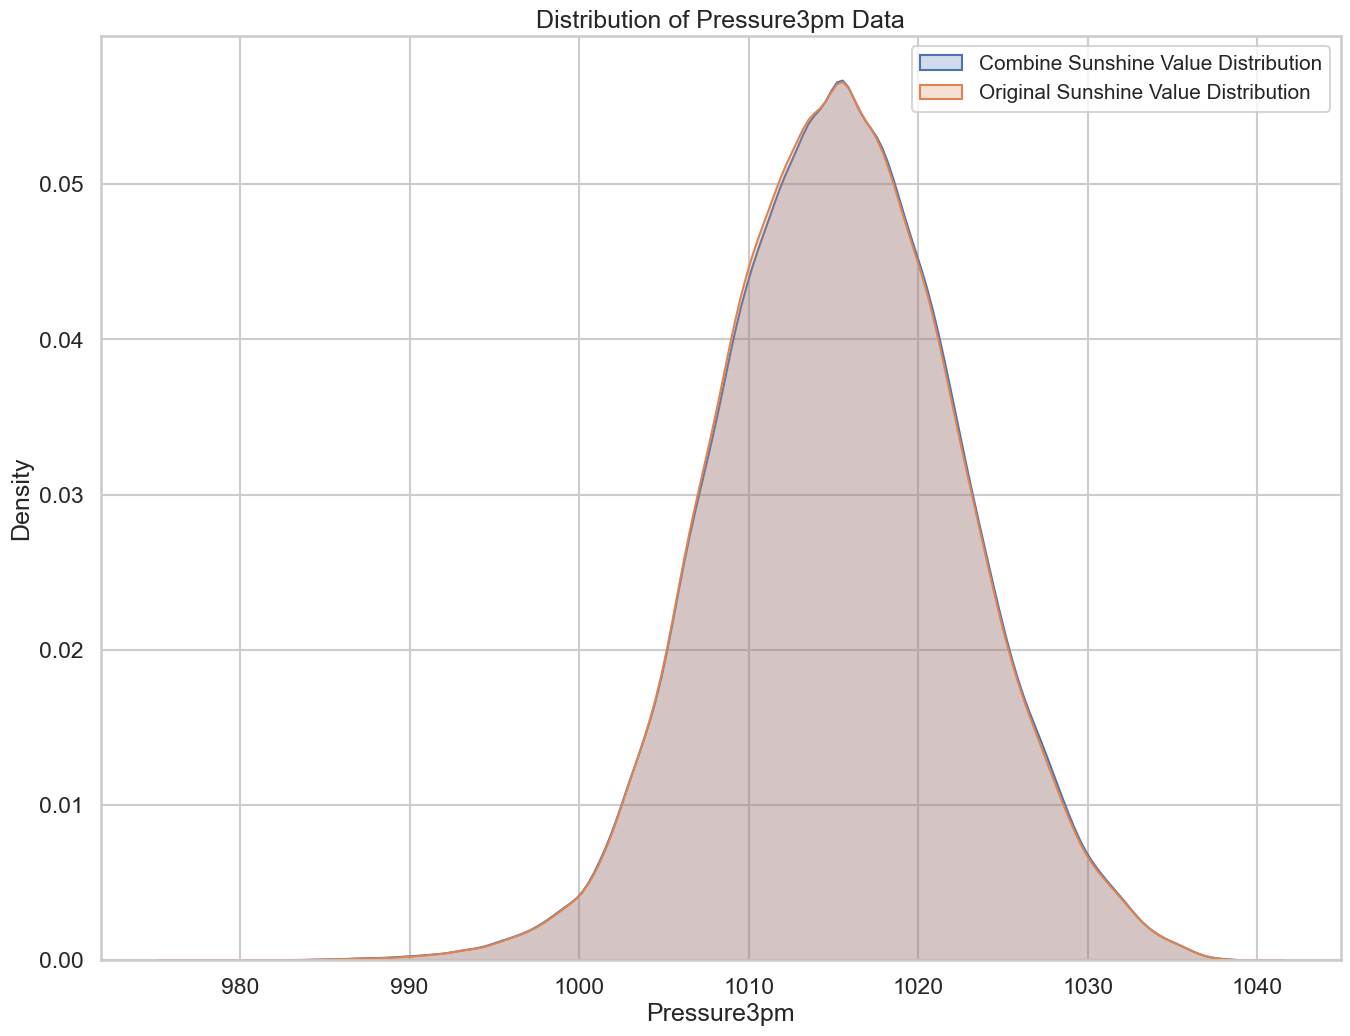

/var/folders/jj/4r8dblf53l9_ssdctfrstl480000gn/T/ipykernel_19428/191067783.py:21: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


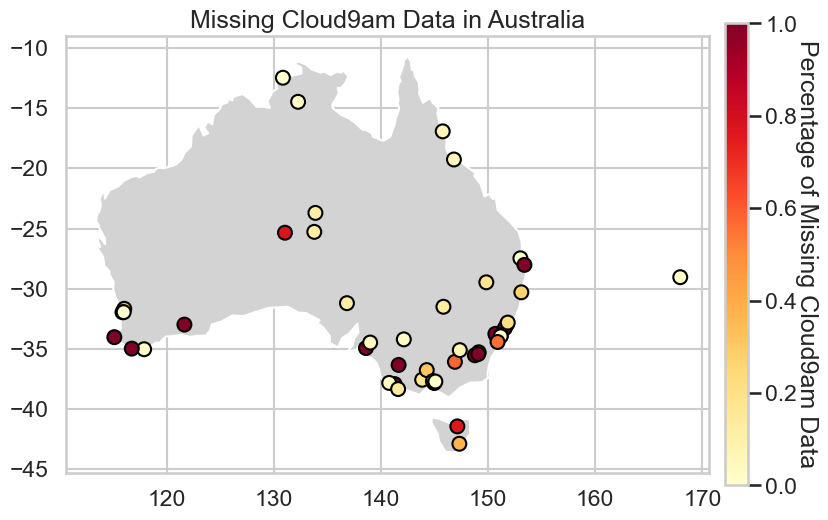

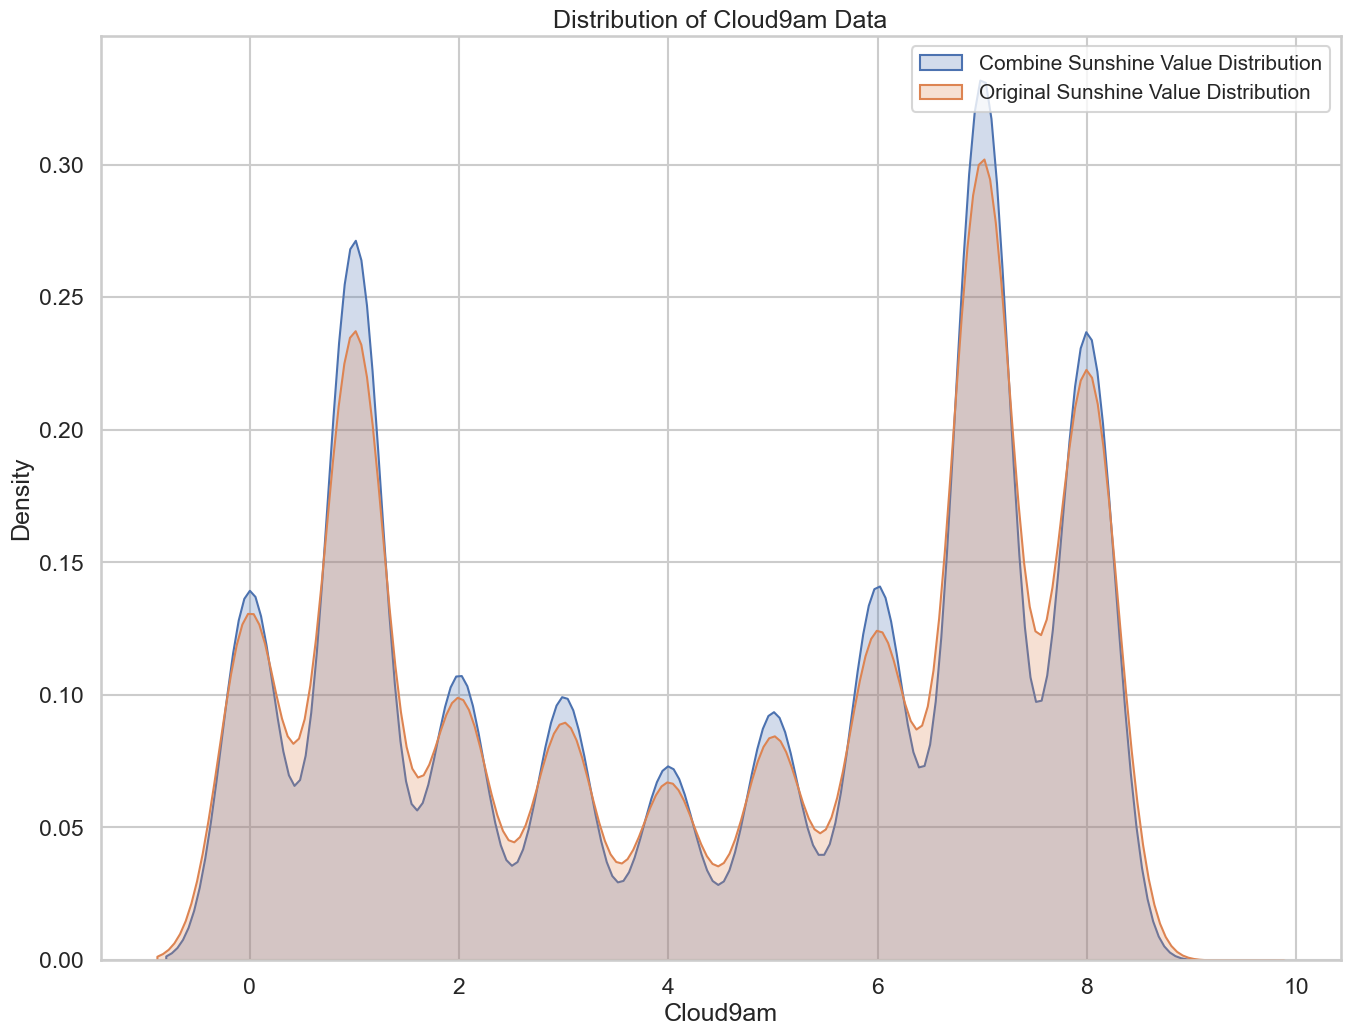

/var/folders/jj/4r8dblf53l9_ssdctfrstl480000gn/T/ipykernel_19428/191067783.py:21: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


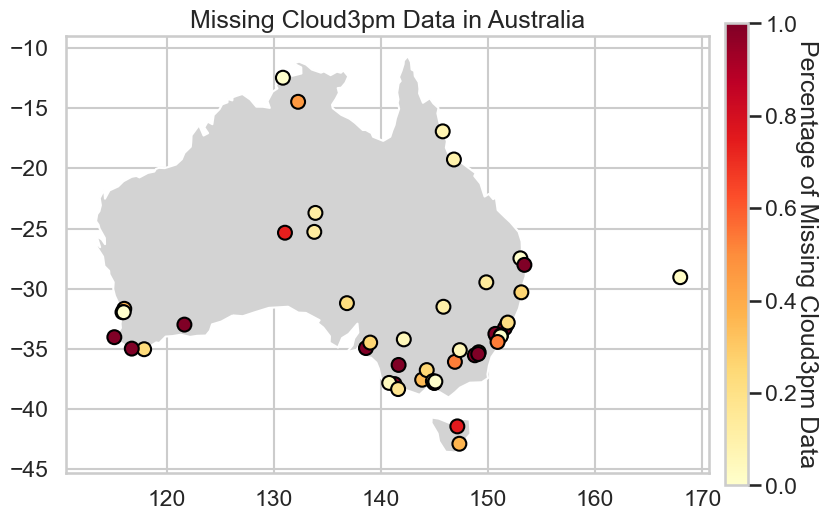

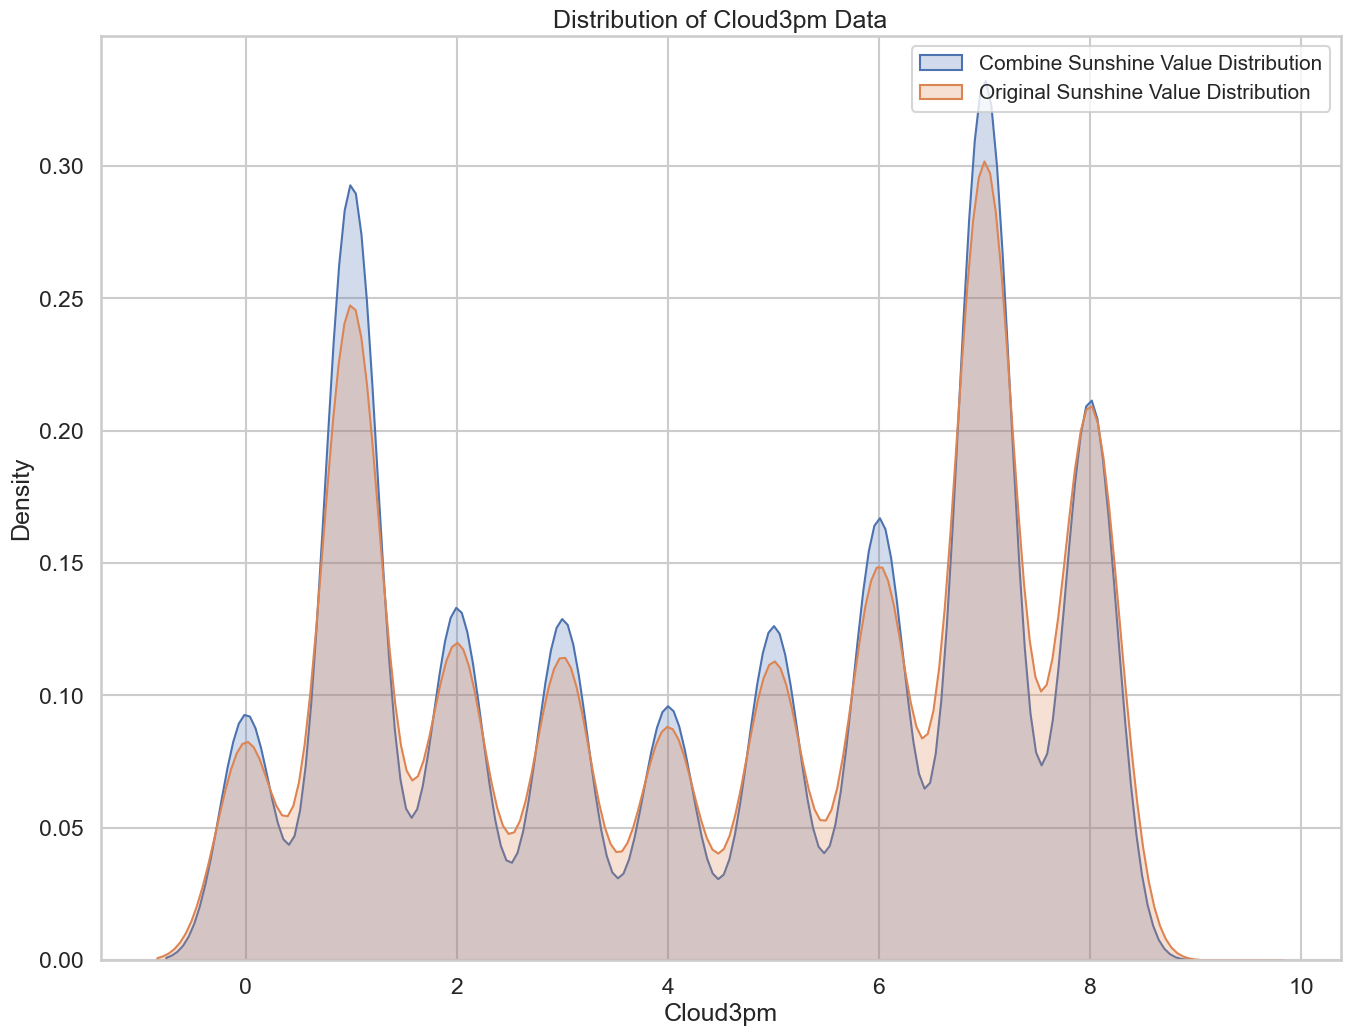

/var/folders/jj/4r8dblf53l9_ssdctfrstl480000gn/T/ipykernel_19428/191067783.py:21: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


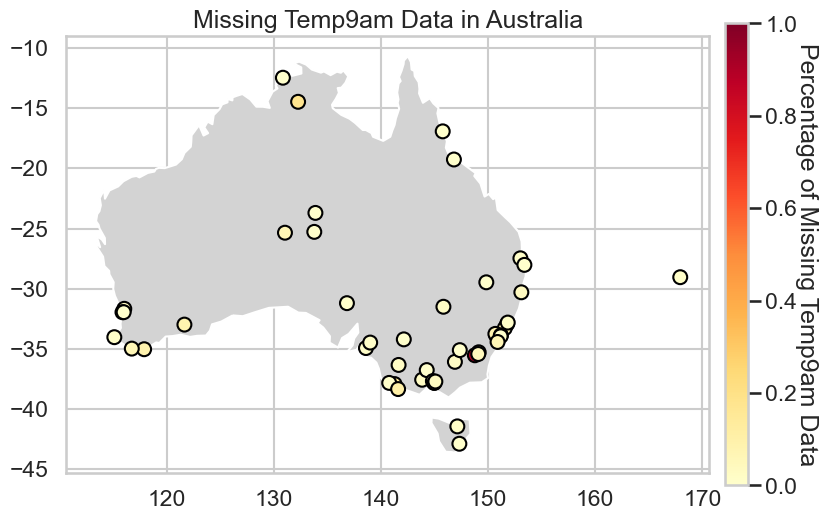

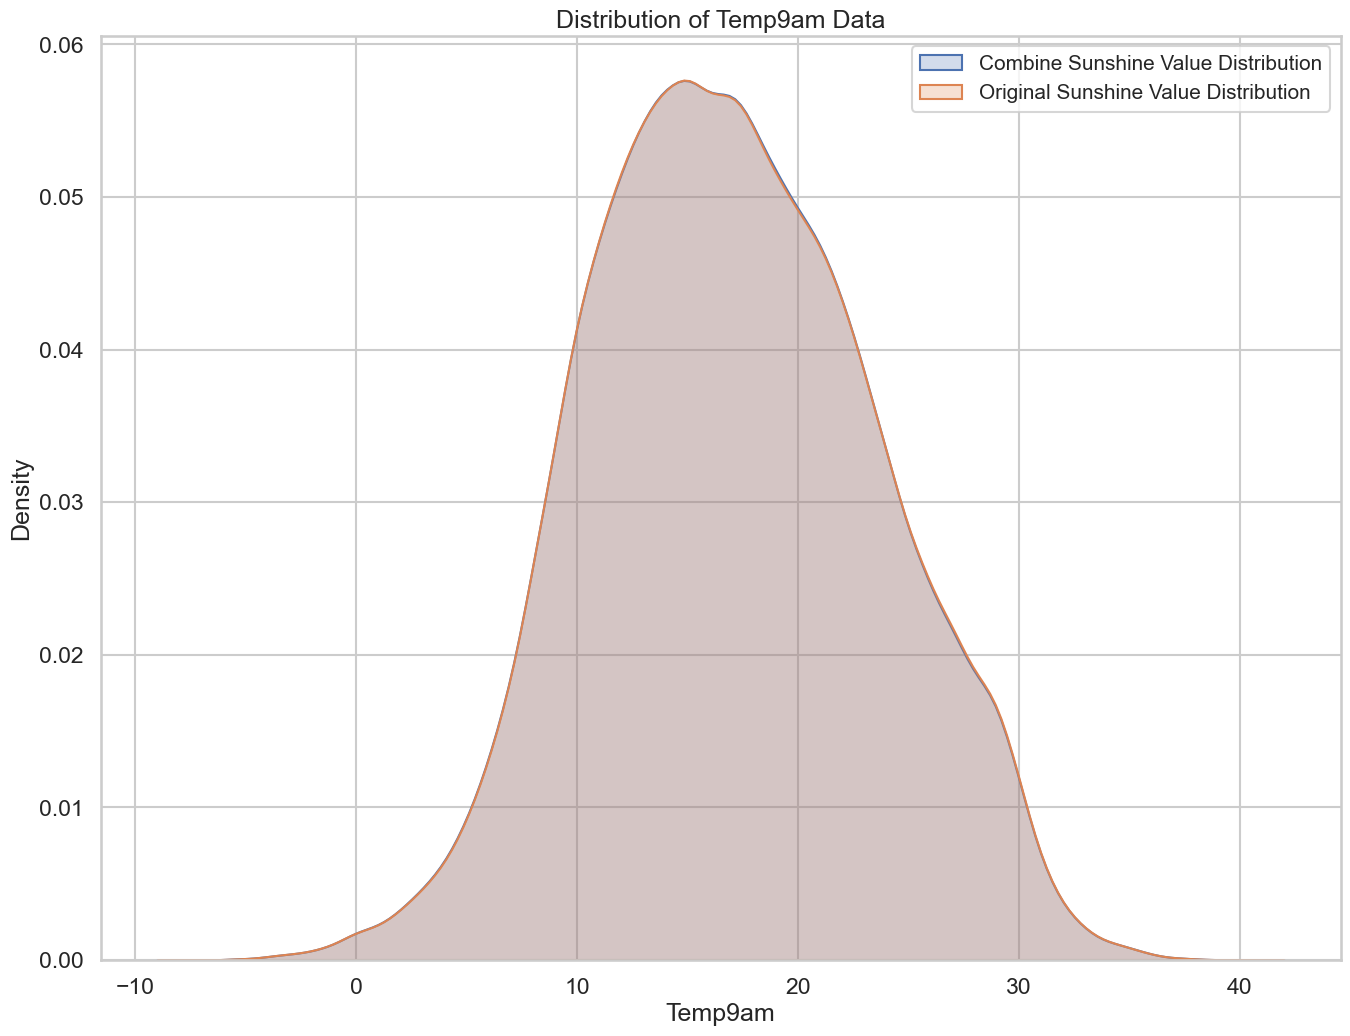

/var/folders/jj/4r8dblf53l9_ssdctfrstl480000gn/T/ipykernel_19428/191067783.py:21: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


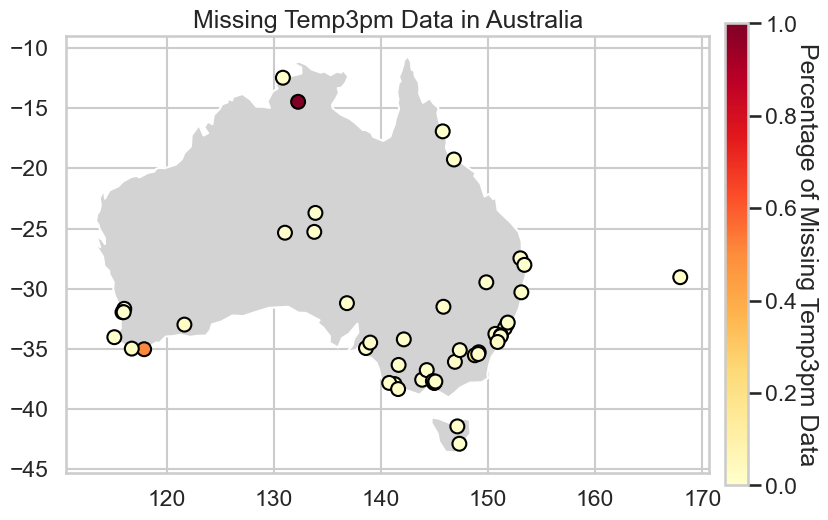

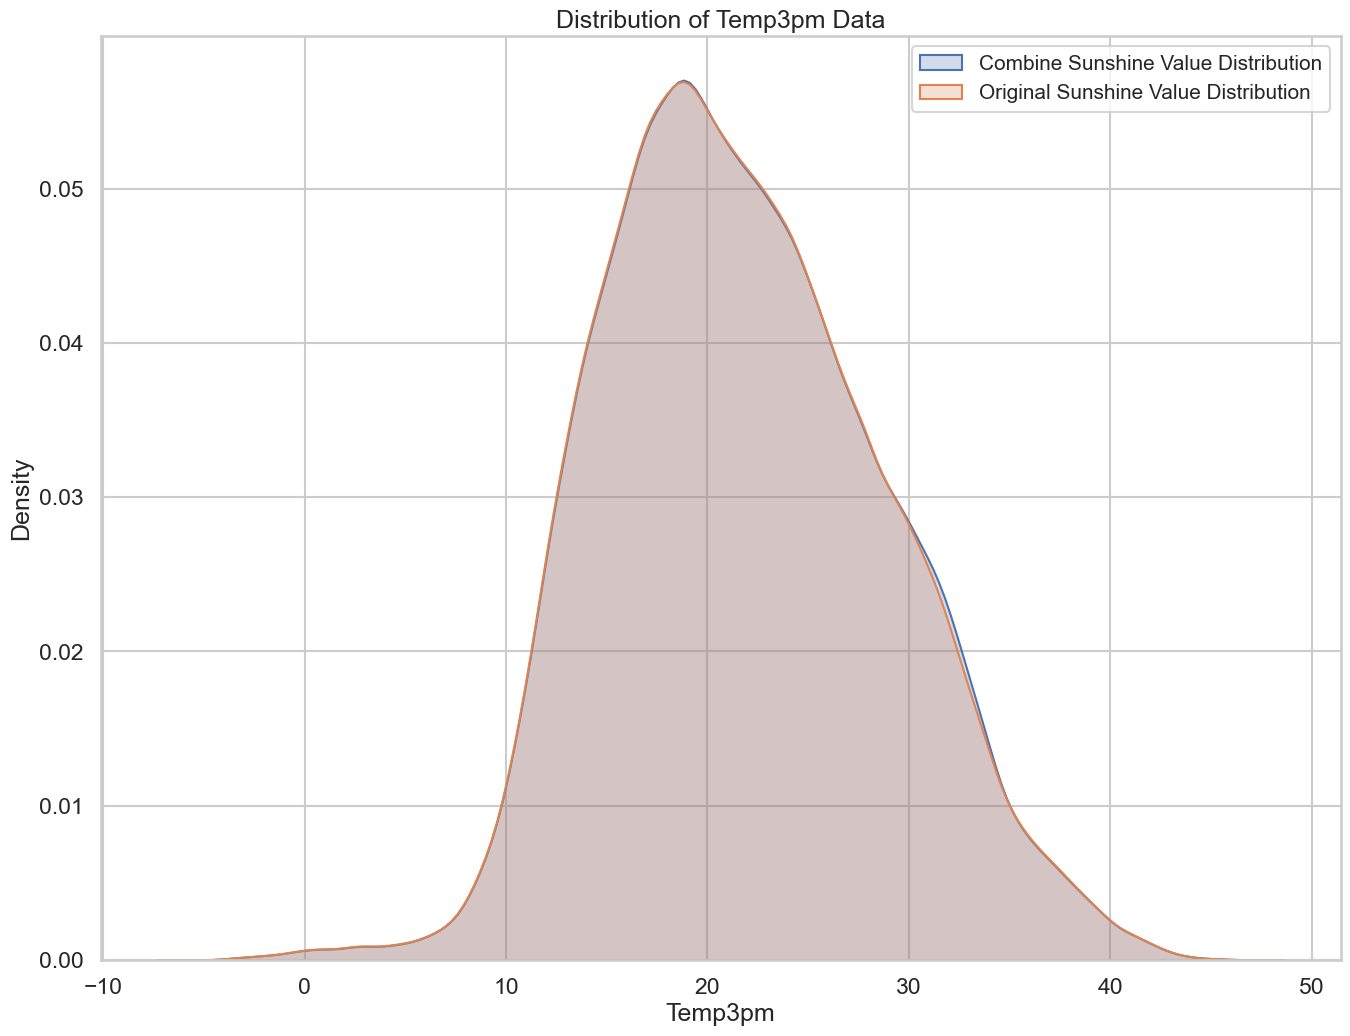

In [42]:
for feature_name in numerical_variables_with_missing_values:
    # create a dataframe that contains the number of missing sunshine values percentage for each city
    missing_sunshine = weather_data.groupby('Location')[feature_name].apply(lambda x: x.isnull().sum()/len(x)).reset_index()
    # add location coordinates to the dataframe
    missing_sunshine['Latitude'] = missing_sunshine['Location'].map(lambda x: city_map[x][0])
    missing_sunshine['Longitude'] = missing_sunshine['Location'].map(lambda x: city_map[x][1])

    # Extract data for plotting
    lats = missing_sunshine['Latitude'].values
    lons = missing_sunshine['Longitude'].values
    sunshine = missing_sunshine[feature_name].values

    # Define a custom colormap from light red to red

    cmap_custom = plt.get_cmap('YlOrRd')

    geometry = [Point(xy) for xy in zip(missing_sunshine['Longitude'], missing_sunshine['Latitude'])]
    geo_df = gpd.GeoDataFrame(missing_sunshine, geometry=geometry)

    # Get the world dataset from geopandas and filter for Australia
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    australia = world[world.name == "Australia"]

    norm = mcolors.Normalize(vmin=0, vmax=1)

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))
    australia.plot(ax=ax, color='lightgrey')
    sc = ax.scatter(lons, lats, c=sunshine, s=100, cmap=cmap_custom, edgecolors='black')

    # Set colorbar label and title
    cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap_custom), ax=ax, orientation='vertical', pad=0.02)
    cbar.set_label(f'Percentage of Missing {feature_name} Data', rotation=270, labelpad=15)
    ax.set_title(f"Missing {feature_name} Data in Australia")

    plt.show()
    
    weather_data_has_feature_name = weather_data[~weather_data[feature_name].isnull()]

    def find_nearest_feature_value(row):
        if np.isnan(row[feature_name]):
            nearest_feature = weather_data_has_feature_name[(weather_data_has_feature_name['Date'] == row['Date'])]
            if len(nearest_feature) > 0:
                nearest_feature = nearest_feature.iloc[distance.cdist([[row['Latitude'], row['Longitude']]], nearest_feature[['Latitude', 'Longitude']]).argmin()]
                return nearest_feature[feature_name]
            else:
                return row[feature_name]
        else:
            return row[feature_name]
    
    weather_data[feature_name] = weather_data.apply(find_nearest_feature_value, axis=1)
    
    # Exame sunshine data distribution
    sns.set(style="whitegrid")
    sns.set_context("talk")

    plt.figure(figsize=(16,12))
    sns.kdeplot(weather_data[feature_name].dropna(),label='Combine Sunshine Value Distribution', fill=True)
    plt.title(f'Distribution of {feature_name} Data')

    # Lets read original file and compare data distribution
    weather_data_original = pd.read_csv('weatherAUS.csv')
    sns.kdeplot(weather_data_original[feature_name].dropna(),label='Original Sunshine Value Distribution', fill=True)

    plt.legend(fontsize='small')
    plt.show()



In [55]:
# Check if there are any missing values left
weather_data.isnull().sum()
weather_data_numerical = weather_data[non_categorical_variables]

# Add rain tomorrow column to the numerical dataset
weather_data_imputation = pd.concat([weather_data_numerical, weather_data[categorical_variables]], axis=1)
weather_data_imputation.dropna(inplace=True)
weather_data_imputation

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Temp3pm,Latitude,Longitude,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,9.6,13.0,44.0,20.0,24.0,71.0,22.0,...,21.8,-36.075119,146.909485,2008-12-01,Albury,W,W,WNW,No,No
1,7.4,25.1,0.0,13.0,13.2,44.0,4.0,22.0,44.0,25.0,...,24.3,-36.075119,146.909485,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,12.9,25.7,0.0,10.2,13.2,46.0,19.0,26.0,38.0,30.0,...,23.2,-36.075119,146.909485,2008-12-03,Albury,WSW,W,WSW,No,No
3,9.2,28.0,0.0,11.0,10.8,24.0,11.0,9.0,45.0,16.0,...,26.5,-36.075119,146.909485,2008-12-04,Albury,NE,SE,E,No,No
4,17.5,32.3,1.0,6.6,8.1,41.0,7.0,20.0,82.0,33.0,...,29.7,-36.075119,146.909485,2008-12-05,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,2.2,0.0,31.0,15.0,13.0,59.0,27.0,...,20.9,-25.344428,131.036882,2017-06-20,Uluru,E,ESE,E,No,No
145455,2.8,23.4,0.0,2.0,9.1,31.0,13.0,11.0,51.0,24.0,...,22.4,-25.344428,131.036882,2017-06-21,Uluru,E,SE,ENE,No,No
145456,3.6,25.3,0.0,1.4,8.7,22.0,13.0,9.0,56.0,21.0,...,24.5,-25.344428,131.036882,2017-06-22,Uluru,NNW,SE,N,No,No
145457,5.4,26.9,0.0,4.0,5.9,37.0,9.0,9.0,53.0,24.0,...,26.1,-25.344428,131.036882,2017-06-23,Uluru,N,SE,WNW,No,No


In [56]:
# Save the data to CSV
weather_data_imputation.to_csv('weatherAUS_imputation.csv', index=False)

/var/folders/jj/4r8dblf53l9_ssdctfrstl480000gn/T/ipykernel_19428/439737644.py:22: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


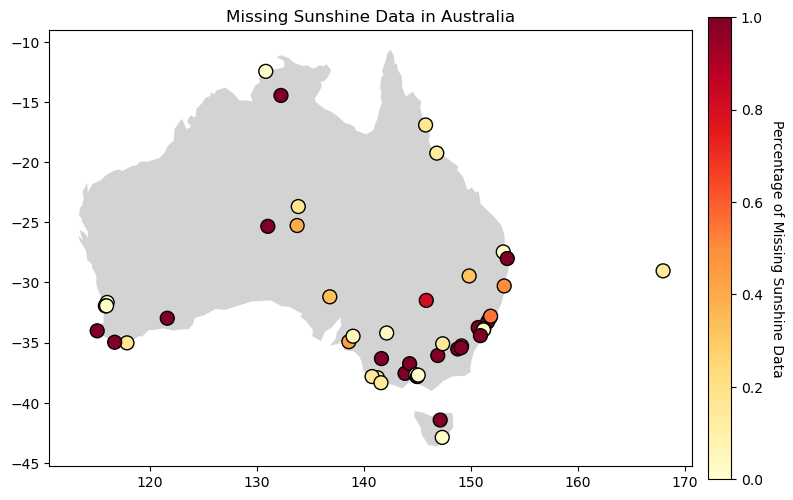

In [10]:
feature_name = 'Sunshine'

# create a dataframe that contains the number of missing sunshine values percentage for each city
missing_sunshine = weather_data.groupby('Location')[feature_name].apply(lambda x: x.isnull().sum()/len(x)).reset_index()
# add location coordinates to the dataframe
missing_sunshine['Latitude'] = missing_sunshine['Location'].map(lambda x: city_map[x][0])
missing_sunshine['Longitude'] = missing_sunshine['Location'].map(lambda x: city_map[x][1])

# Extract data for plotting
lats = missing_sunshine['Latitude'].values
lons = missing_sunshine['Longitude'].values
sunshine = missing_sunshine[feature_name].values

# Define a custom colormap from light red to red

cmap_custom = plt.get_cmap('YlOrRd')

geometry = [Point(xy) for xy in zip(missing_sunshine['Longitude'], missing_sunshine['Latitude'])]
geo_df = gpd.GeoDataFrame(missing_sunshine, geometry=geometry)

# Get the world dataset from geopandas and filter for Australia
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
australia = world[world.name == "Australia"]

norm = mcolors.Normalize(vmin=0, vmax=1)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
australia.plot(ax=ax, color='lightgrey')
sc = ax.scatter(lons, lats, c=sunshine, s=100, cmap=cmap_custom, edgecolors='black')

# Set colorbar label and title
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap_custom), ax=ax, orientation='vertical', pad=0.02)
cbar.set_label(f'Percentage of Missing {feature_name} Data', rotation=270, labelpad=15)
ax.set_title(f"Missing {feature_name} Data in Australia")

plt.show()

In [11]:
weather_data_has_feature_name = weather_data[~weather_data[feature_name].isnull()]

def find_nearest_feature_value(row):
    if np.isnan(row[feature_name]):
        nearest_feature = weather_data_has_feature_name[(weather_data_has_feature_name['Date'] == row['Date'])]
        if len(nearest_feature) > 0:
            nearest_feature = nearest_feature.iloc[distance.cdist([[row['Latitude'], row['Longitude']]], nearest_feature[['Latitude', 'Longitude']]).argmin()]
            return nearest_feature[feature_name]
        else:
            return row[feature_name]
    else:
        return row[feature_name]
    
weather_data[feature_name] = weather_data.apply(find_nearest_feature_value, axis=1)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Latitude,Longitude
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,13.0,W,44.0,W,...,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,-36.075119,146.909485
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,13.2,WNW,44.0,NNW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,-36.075119,146.909485
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,13.2,WSW,46.0,W,...,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,-36.075119,146.909485
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,10.8,NE,24.0,SE,...,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,-36.075119,146.909485
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,8.1,W,41.0,ENE,...,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,-36.075119,146.909485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,9.1,E,31.0,SE,...,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,-25.344428,131.036882
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,8.7,NNW,22.0,SE,...,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,-25.344428,131.036882
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,5.9,N,37.0,SE,...,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,-25.344428,131.036882
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,6.4,SE,28.0,SSE,...,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No,-25.344428,131.036882


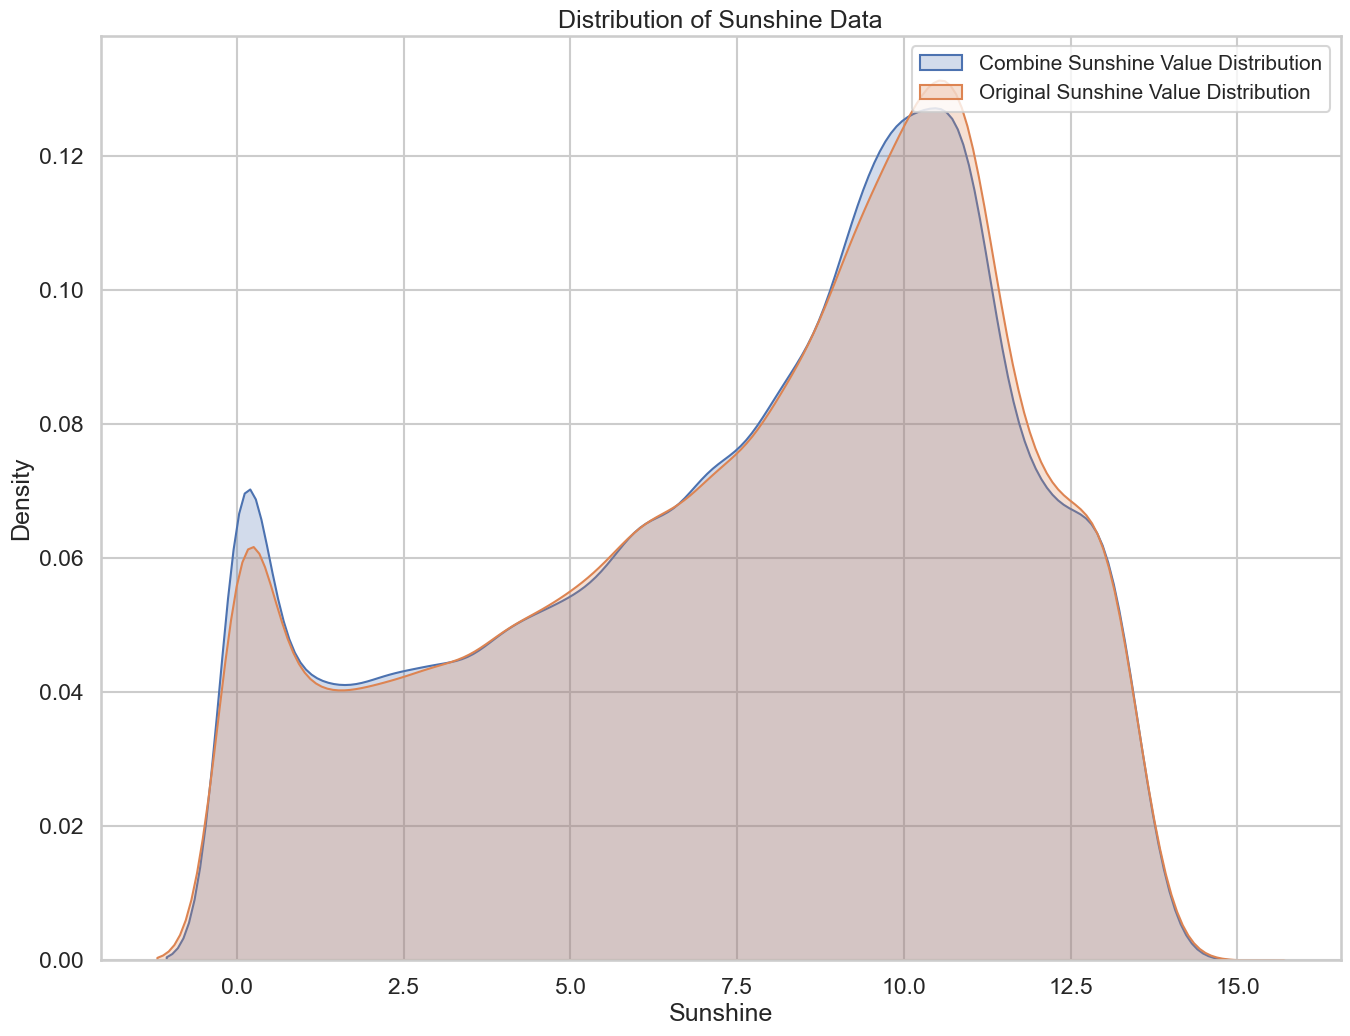

In [34]:
# Exame sunshine data distribution
import seaborn as sns
sns.set(style="whitegrid")
sns.set_context("talk")

plt.figure(figsize=(16,12))
sns.kdeplot(weather_data[feature_name].dropna(),label='Combine Sunshine Value Distribution', fill=True)
plt.title(f'Distribution of {feature_name} Data')

# Lets read original file and compare data distribution
weather_data_original = pd.read_csv('weatherAUS.csv')
sns.kdeplot(weather_data_original[feature_name].dropna(),label='Original Sunshine Value Distribution', fill=True)

plt.legend(fontsize='small')
plt.show()